# Introduction to Hypothesis Testing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
stack_overflow = pd.read_feather(r'D:\GitHub Project\Google_Colab_DataCamp_Data_Analyst\Hypothesis Testing In Python\stack_overflow.feather')

print(stack_overflow)

      respondent                                        main_branch hobbyist  \
0           36.0  I am not primarily a developer, but I write co...      Yes   
1           47.0                     I am a developer by profession      Yes   
2           69.0                     I am a developer by profession      Yes   
3          125.0  I am not primarily a developer, but I write co...      Yes   
4          147.0  I am not primarily a developer, but I write co...       No   
...          ...                                                ...      ...   
2256     62812.0                     I am a developer by profession      Yes   
2257     62835.0                     I am a developer by profession      Yes   
2258     62837.0                     I am a developer by profession      Yes   
2259     62867.0  I am not primarily a developer, but I write co...      Yes   
2260     62882.0                     I am a developer by profession      Yes   

       age  age_1st_code age_first_code

# Two-Sample and ANOVA Tests
### Paired t-test
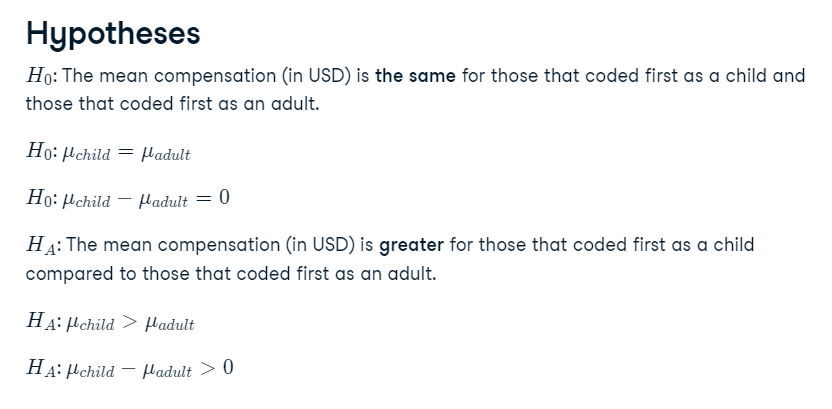


In [3]:
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

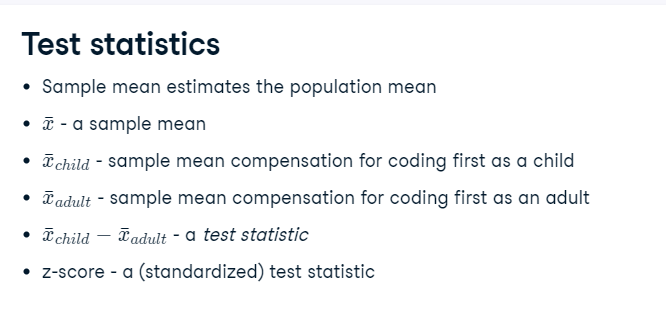

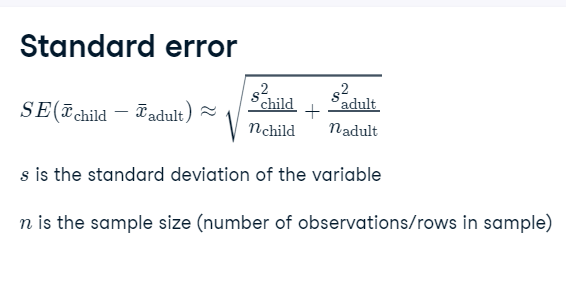
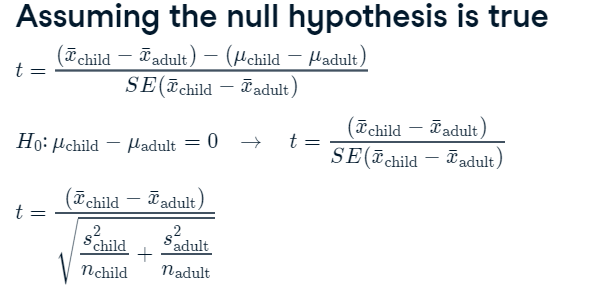

In [4]:
#Test statistic
    # z score = (samp stat - pop parameter)/ std error
    # t score = (x_child - x_adult)-(u_child - u_adult)/SError(x_child - x_adult)
xbar = stack_overflow. groupby("age_first_code_cut")['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [5]:
s = stack_overflow. groupby ('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [6]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [7]:
#calculating the test statistic
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

NameError: name 'xbar_child' is not defined

### Paired t-tests

Hypothesis: Question: Was the percentage of Republican candidate votes lower in 2008 than 2012?

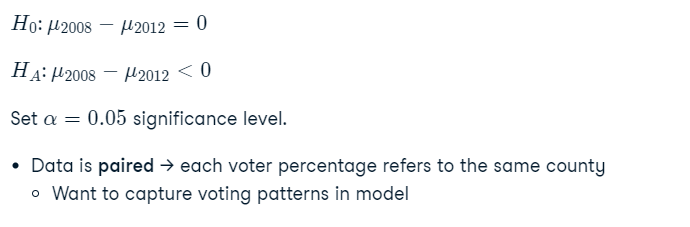

In [8]:
repub_votes_potus_08_12 = pd.read_feather(r"D:\GitHub Project\Google_Colab_DataCamp_Data_Analyst\Hypothesis Testing In Python\repub_votes_potus_08_12.feather")
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data["repub_percent_12"]

<AxesSubplot:>

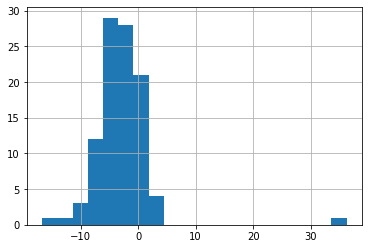

In [9]:
sample_data['diff'].hist(bins =20)

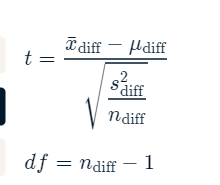

In [ ]:
xbar_diff = sample_data['diff'].mean()
xbar_diff

-2.877109041242944

In [ ]:
n_diff = len(sample_data) # degree of freedom = n -1
n_diff

100

In [ ]:
s_diff = sample_data['diff'].std()
s_diff

5.136737887231852

In [ ]:
#t stat
t_stat = (xbar_diff - 0)/np.sqrt(s_diff**2/n_diff)
t_stat

-5.601043121928489

In [ ]:
degree_of_freedom = n_diff - 1

In [ ]:
from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
p_value # p value is too small, reject null, Republican candidates got a smaller percentage

9.572537285272411e-08

Testing differences between two means using ttest()

In [13]:
import pingouin
pingouin.ttest(x=sample_data['diff'],
                y =0,
                alternative ="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


In [ ]:
pingouin.ttest(x=sample_data['repub_percent_08'],
                y =sample_data['repub_percent_12'],
                paired=True,
                alternative ="less") # appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


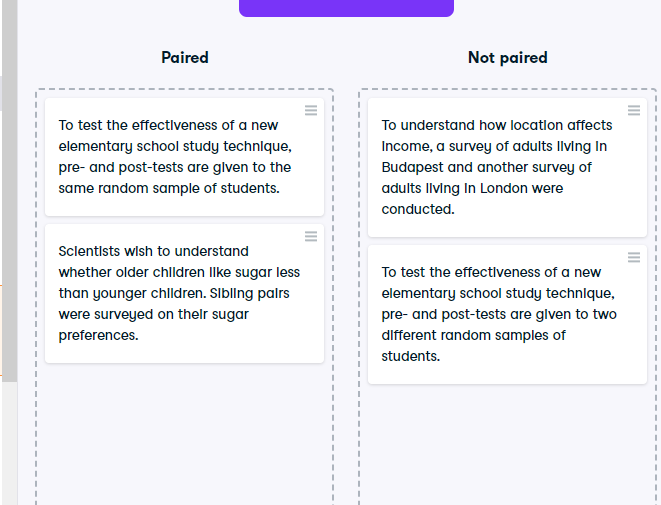

### ANOVA tests
dùng để test khi có nhiều hơn 2 nhóm để so sánh diff

In [10]:
stack_overflow[ 'job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

**Visualizing multiple distributions**

ls mean annual compensation different for
different levels of job satisfaction?


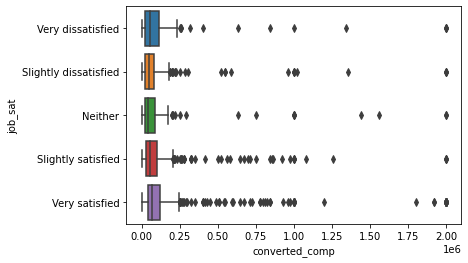

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'converted_comp',
            y="job_sat",
            data = stack_overflow)
plt.show()

**4. Analysis of variance (ANOVA)**

ANOVA tests determine whether there are differences between the groups. We begin by setting our significance level to point-two. This value is larger than in many situations but will help us understand the implications on comparing different numbers of groups later on. We use the pingouin anova method to compare values across multiple groups. We specify the data as stack_overflow, the dependent variable, dv, as converted_comp, and the column of groups to calculate between as job_sat. The p-value is stored in the p-unc column, which is point-zero-zero-one-three, which is smaller than alpha at 20 percent. That means that at least two of the categories of job satisfaction have significant differences between their compensation levels, but this doesn't tell us which two categories they are.

In [14]:
alpha = 0.2 #significance level
#pingouin.anova function
pingouin.anova(data = stack_overflow,
               dv = "converted_comp", #dependant variable between the group of 'job_sat' 
               between='job_sat')
# >0.0013, smaller than aplha at 0.2

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


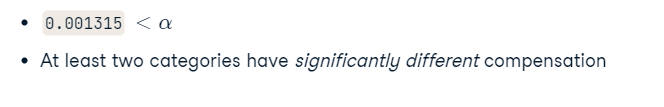

#### Mọi hypothesis cần test cho 5 categorical data
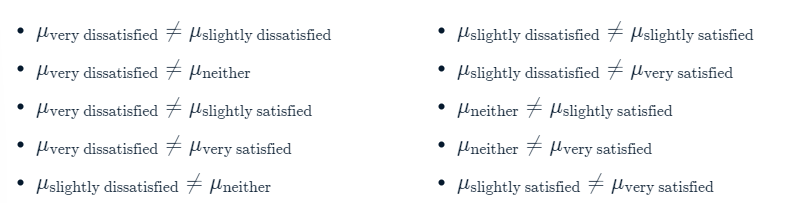

In [15]:
#Pairwise_tests() run all in 1 go
pingouin. pairwise_tests(data=stack_overflow,
dv="converted_comp",
between='job_sat',
padjust = None) #p_adjust

# > punc column
 

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


# Vì số lượng test cho số group tăng theo cấp số nhân
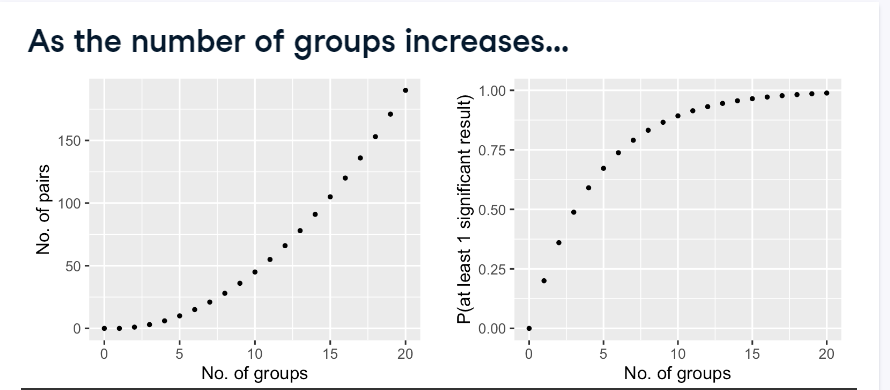

In this case we have five groups, resulting in ten pairs. As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. The more tests we run, the higher the chance that at least one of them will give a **false positive** significant result. With a significance level of point-two, if we run one test, the chance of a **false positive** result is point-two. With five groups and ten tests, the probability of at least one **false positive** is around point-seven. With twenty groups, it's almost guaranteed that we'll get at least one false positive.


## Nên để giảm false positive ta dùng Bonferroni correction


In [16]:
#Pairwise_tests() run all in 1 go
pingouin. pairwise_tests(data=stack_overflow,
dv="converted_comp",
between='job_sat',
padjust = "bonf") #p_adjust = Bonferroni correction

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


## Proportion Test

### One-sample proportion tests
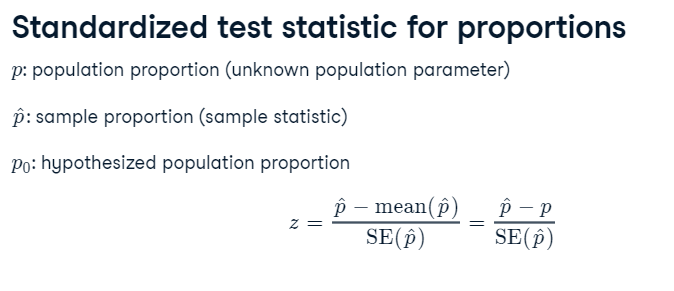

Assuming Ho is true, p = p0


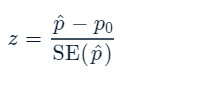

Simplifying the standard error for z
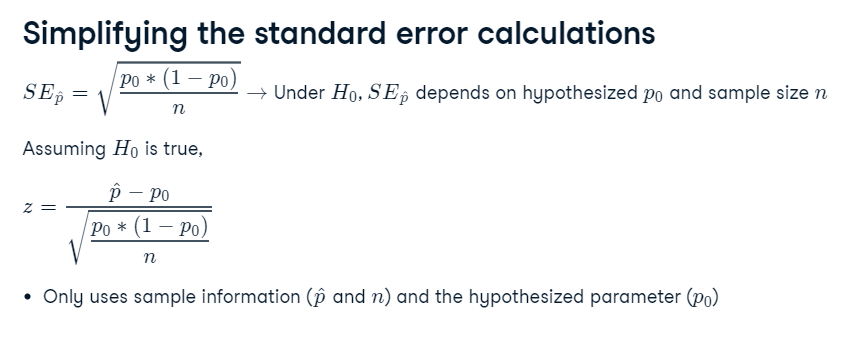

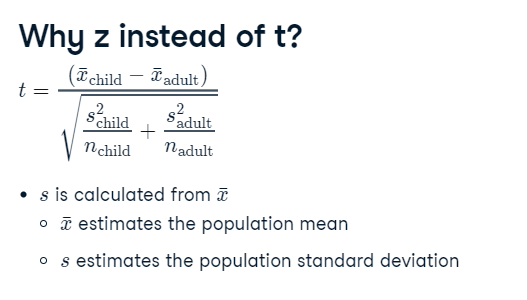

We use a z-distribution when we have a proportion because we only use one estimate (p-hat) to compare with the population proportion (p). We use a t-distribution when we have a mean because we use two estimates (x-bar and s) to compare with the population mean (mu) and standard deviation (sigma). The t-distribution has more variability than the z-distribution because of this extra estimation.

In [17]:
# Ho: stack Overflow users under thirty = 0.5
alpha = 0.01
stack_overflow['age_cat'].value_counts(normalize=True)


Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

In [19]:
p_hat = (stack_overflow['age_cat'] == "Under 30").mean()
p_0 = 0.5
n=len(stack_overflow)

In [21]:
import numpy as np

numerator = p_hat - p_0

denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator / denominator
z_score


3.385911440783663

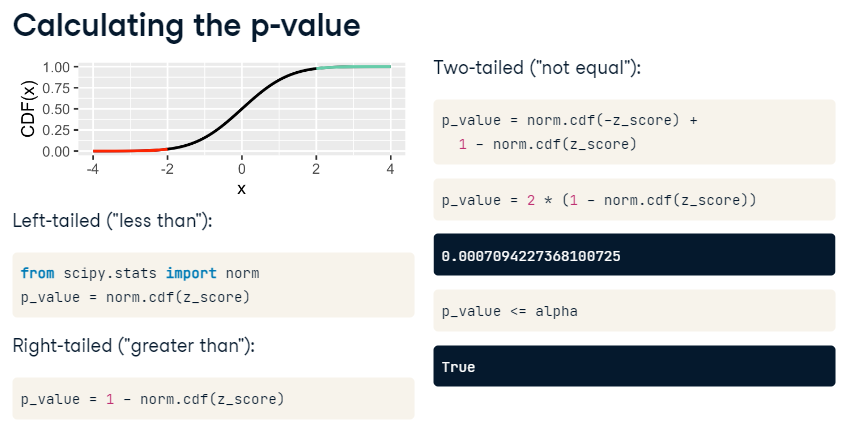

In [23]:
from scipy.stats import norm
p_value = norm.cdf(z_score)


### Two-sample proportion tests
Comparing two proportions

H: Proportion of hobbyist users is the same for those under thirty as those at least thirty
Ho: p>30 — P<30 = 0
H 4: Proportion of hobbyist users different for those under thirty to those at least thirty
Ha: p>30 — p-30 #0

alpha = 0.05

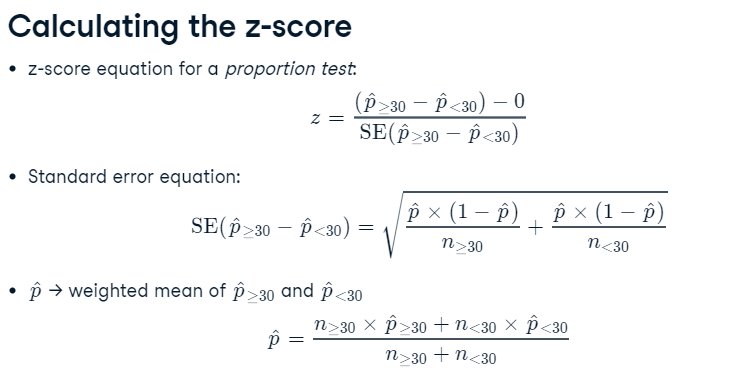

In [32]:
p_hats = stack_overflow. groupby("age_cat")['hobbyist'].value_counts(normalize=True)

 

stack_overflow.groupby("age_cat")['hobbyist'].count()

p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [37]:
p_hat_at_least_30 = p_hats[("At least 30", "Yes")]
p_hat_under_30 = p_hats[("Under 30", "Yes")]
print (p_hat_at_least_30, p_hat_under_30)


0.7733333333333333 0.8431048720066061


In [35]:
n= stack_overflow. groupby("age_cat")['hobbyist'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [36]:
n_at_least_30 = n["At least 30"]
n_under_30 = n["Under 30"]
print(n_at_least_30, n_under_30)


1050 1211


In [39]:
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30) /(n_at_least_30 + n_under_30)

std_error = np.sqrt(p_hat * (1-p_hat) / n_at_least_30 +
p_hat * (1-p_hat) / n_under_30)

z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
print(z_score)


-4.223691463320559


In [41]:
#Dùng proportions_ztest()
stack_overflow. groupby("age_cat")['hobbyist'].value_counts()


age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [45]:
n_hobbyist = np.array([812,1021])
n_rows = np.array([812+238,1021+190])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows,
                                    alternative='two-sided')

print(z_score, p_value) 
#> p_value is < alpha

-4.223691463320559 2.403330142685068e-05


### Chi-square test of independence

In [48]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist',y='age_cat', correction=False)

   

print (stats)
#> chi2: x**2 = z_score **2

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


In [50]:
p_hats = stack_overflow['age_cat'].value_counts()
p_hats

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

In [52]:
p_hats = stack_overflow['job_sat'].value_counts()
p_hats

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

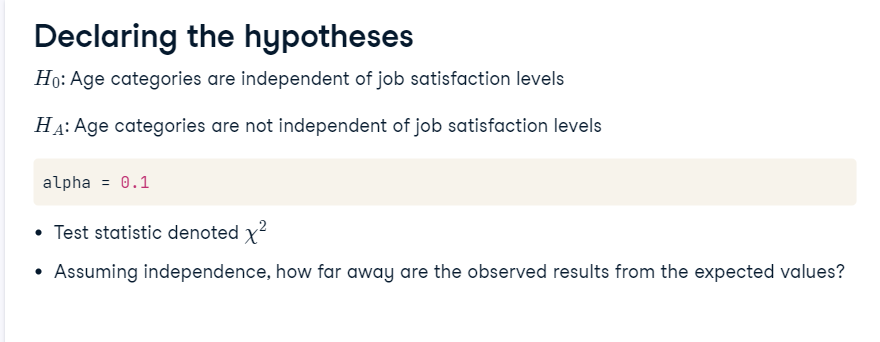

<AxesSubplot:xlabel='job_sat'>

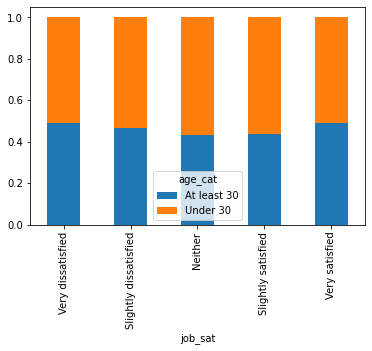

In [54]:
#Exploratory visualization: proportional stacked bar plot
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked = True)


In [55]:
#ko rút ra đc gì, dùng chi square để test significance
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
print (stats)
    ###Degree of Freedom = 4
#>

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


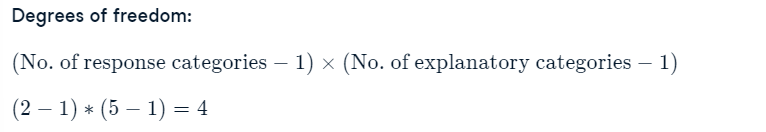

df = 4
pval = 0.2351, cao hơn significance level, => age are independent of job satisfaction

#### Swaping the variable vì nó independent

<AxesSubplot:xlabel='age_cat'>

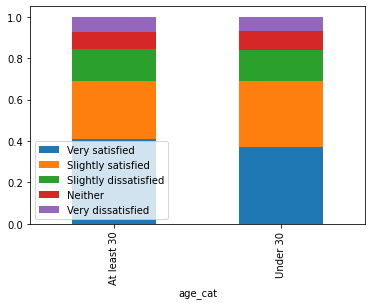

In [56]:
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True) 

In [59]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="age_cat", y="job_sat")
print (stats)
stats[stats['test'] == 'pearson']

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.552373,4.0,0.235164,0.049555,0.437417


We didn't worry about tails in this test, and in fact, the chi2_independence method doesn't have an alternative argument. This is because the chi-square test statistic is based on the square of observed and expected counts, and square numbers are non-negative. That means that chi-square tests tend to be right-tailed tests.

*  Observed and expected counts squared must be non-negative

* chi-square tests are almost always right-tailed 1


### Chi-square goodness of fit tests

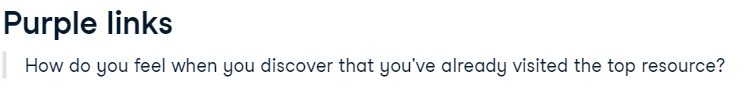

In [64]:
purple_link_counts = stack_overflow ['purple_link'].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [65]:
purple_link_counts = purple_link_counts.rename_axis('purple_link')\
.reset_index(name='n')\
.sort_values('purple_link')

purple_link_counts


,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [67]:
#Create a DataFrame for these hypothesized 
hypothesized = pd.DataFrame({
'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
'prop': [1/6, 1/6, 1/2, 1/6]})
hypothesized



,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


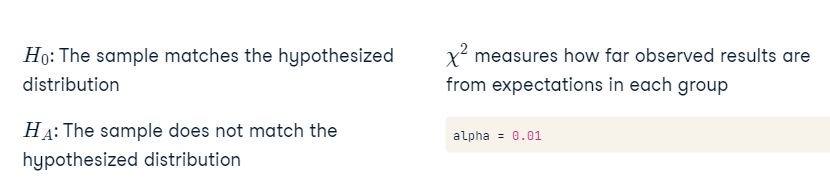

In [68]:
alpha =0.01

In [73]:
#Hypothesized counts by category
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total
hypothesized


,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


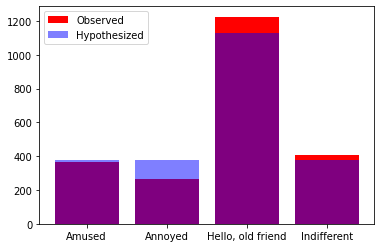

In [72]:
 

import matplotlib.pyplot as plt

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'],
color='red', label='Observed')
plt.bar(purple_link_counts['purple_link'], hypothesized['n'], alpha =0.5,
        color ='blue',label ='Hypothesized')
plt.legend()
plt.show()

Run chi-square test

In [74]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'],f_exp = hypothesized['n'])
# smaller than significant level, => different

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

### Assumptions in hypothesis testing
quá nhiều thông tin để note so here: https://campus.datacamp.com/courses/hypothesis-testing-in-python/non-parametric-tests-4?ex=1

#### Non-parametric Test
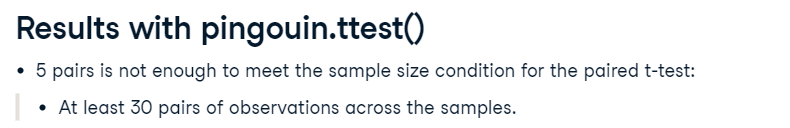

In [76]:
alpha = 0.01

import pingouin

pingouin.ttest (x=repub_votes_potus_08_12['repub_percent_08'],
y=repub_votes_potus_08_12['repub_percent_12'],
paired=True,
alternative="less")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


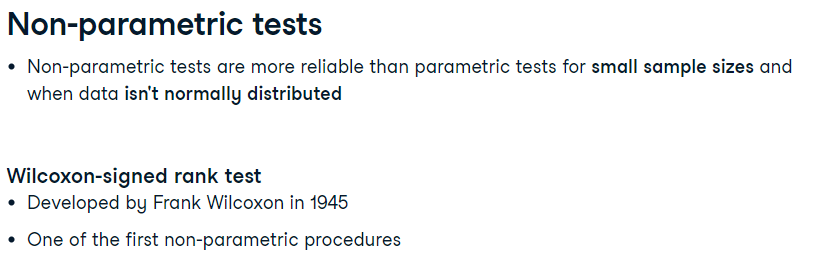

In [77]:
#Rank data from scipy.stats
x = [1, 15, 3, 10, 6]
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

In [ ]:
#Non para test reliable than parametric tst for small sample size
# Wilcoxon-signed rank test (Step 1)

# *  Works on the ranked absolute differences between the pairs of data
repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] -

repub_votes_smalL[ 'repub_percent_12']
print (repub_votes_small)
